### Question 1

Link to the [table](https://docs.google.com/spreadsheets/d/1ptc3moQvpXKUhy6iYVKo2feBY-Co-6R8_hO8DGLeyRw/edit?usp=sharing). Files are also attached with the pdf.

### Question 2

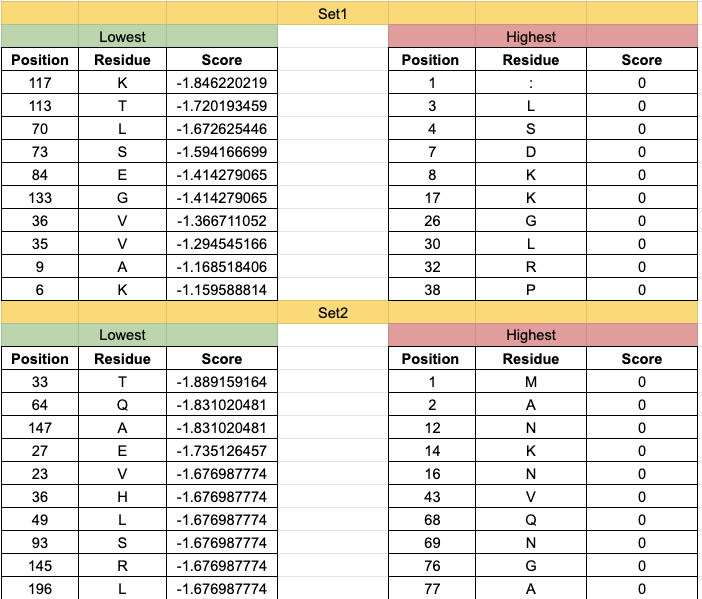

### Question 3

In [29]:
from DnaUtils import readClustal
ids, seqs = readClustal("set2_MSA.mafft")
alignments = [x for x in zip(*seqs)]
header = seqs[0].replace('-',':')
mat = []

for row in open("Blossum62.txt").read().split('\n'):
    mat.append([char for char in row.split(" ") if char != ''])
mat = mat[1:]
order = list(zip(*mat))[0]
mat = list(zip(*mat))[1:]
order_mat = [a+b for a in order for b in order]
temp = []
for x in mat:
    temp += x
temp = list(map(int,temp))
blossum62= dict(zip(order_mat,temp))

def freq(seq):
    from collections import Counter
    residues = Counter(seq) 
    if '-' in residues:
        residues.pop('-')
    n = sum(residues.values())
    residues = {x :y/n for x,y in residues.items()}
    return Counter(residues)

def overall_freq(seqs):
    return freq(''.join(seqs))

overall_f = overall_freq(seqs)

def entropy(seq):
    from math import log
    residues = freq(seq)
    return sum([y*log(y) for x,y in residues.items()])

def variance(seq):
    C = freq(seq)
    return (sum([(C[residue] - overall_f[residue])**2 \
                 for residue in overall_f]))**0.5

def sum_of_pairs(seq):
    x = freq(seq)
    return sum([x[seq1] * x[seq2] * blossum62[seq1+seq2] for seq1 in x for seq2 in x])

def calculate(seqs, method = 'entropy'):
    if method == 'sum_of_pairs':
        func = sum_of_pairs
    elif method == 'variance':
        func = variance
    elif method == 'entropy':
        func = entropy
    temp = []
    for i,(seq,h) in enumerate(zip(alignments,header), start = 1):
        temp.append(f'{i},{h},{func(seq)}')
    return '\n'.join(["No.,Residue,Score"] + temp)

### Question 4

Link to [comparision table](https://docs.google.com/spreadsheets/d/1Oe9q1sNSTpPPP92D9-jDMvkvcVtTKbDvVJSIEkFxXnI/edit?usp=sharing)   
- For set 1, all scores are the same
- For set 2, 13 positions are different:
72,
162,
163,
164,
165,
258,
259,
260,
261,
262,
263,
264,

### Question 5

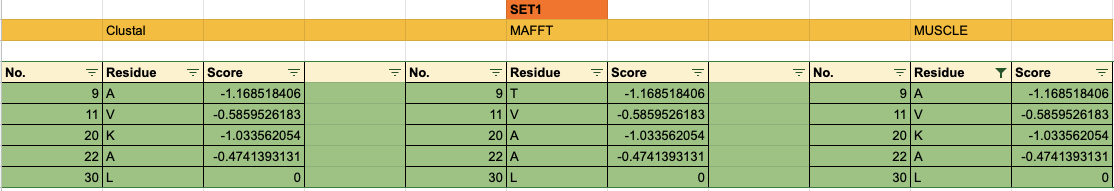

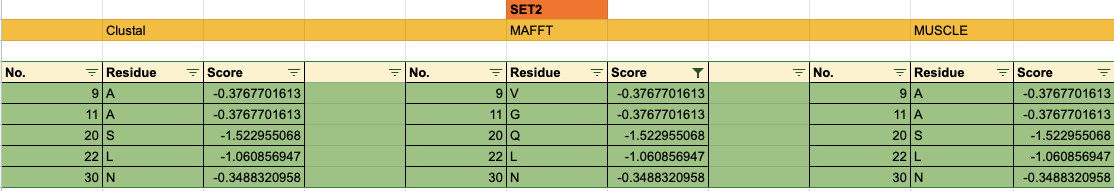

### Question 6

[Link to file](https://drive.google.com/file/d/1KHwqSeMZ0A7w40G1lKt1CZb2NpsGGR0_/view?usp=sharing) containting conservation scores. File is also attached with this pdf. 

<b>Alignment details</b>   
The average number of replacements between any two sequences in the alignment;   
A distance of 0.01 means that on average, the expected replacement for every 100 positions is 1.   
1. Average pairwise distance : 0.99628   
2. Lower bound : 0.10971   
3. Upper bound : 1.89437   

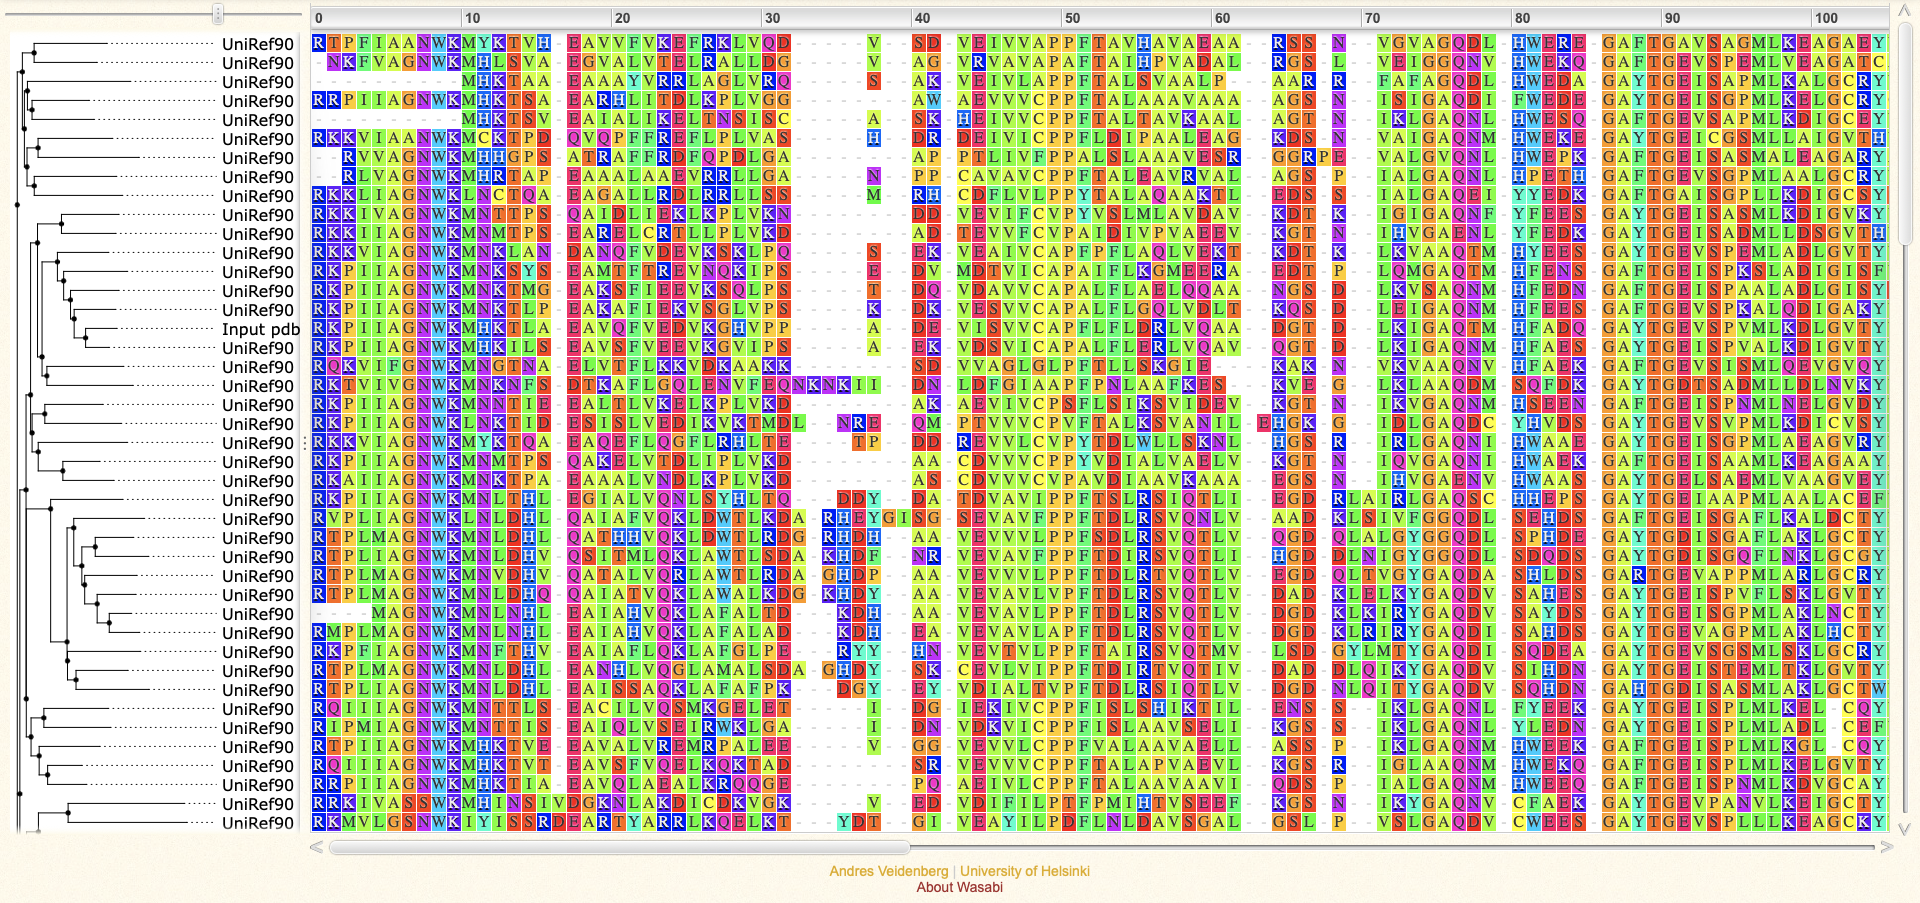